In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

In [2]:
url  = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [4]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [5]:
df.columns[df.isnull().any()]


Index([], dtype='object')

In [6]:
df = df.drop(["COUNTY_NAME","STATE_NAME"], axis=1)

In [7]:
df_list = sorted(list(df.columns))
df_list

['% Asian-alone',
 '% Black-alone',
 '% Hawaiian/PI-alone',
 '% NA/AI-alone',
 '% Two or more races',
 '% White-alone',
 '0-9',
 '0-9 y/o % of total pop',
 '10-19 y/o % of total pop',
 '19-Oct',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'Active General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)',
 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Active Physicians per 100000 Population 2018 (AAMC)',
 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
 'Asian-alone pop',
 "Bachelor's degree or higher 2014-18",
 'Black-alone pop',
 'CI90LBINC_2018',
 'CI90UBINC_2018',
 'CKD_Lower 95% CI',
 'CKD_Upper 95% CI',
 'CKD_number',
 'CKD_prevalence'

In [8]:
df_numerical = df.select_dtypes(include=np.number)

<Axes: >

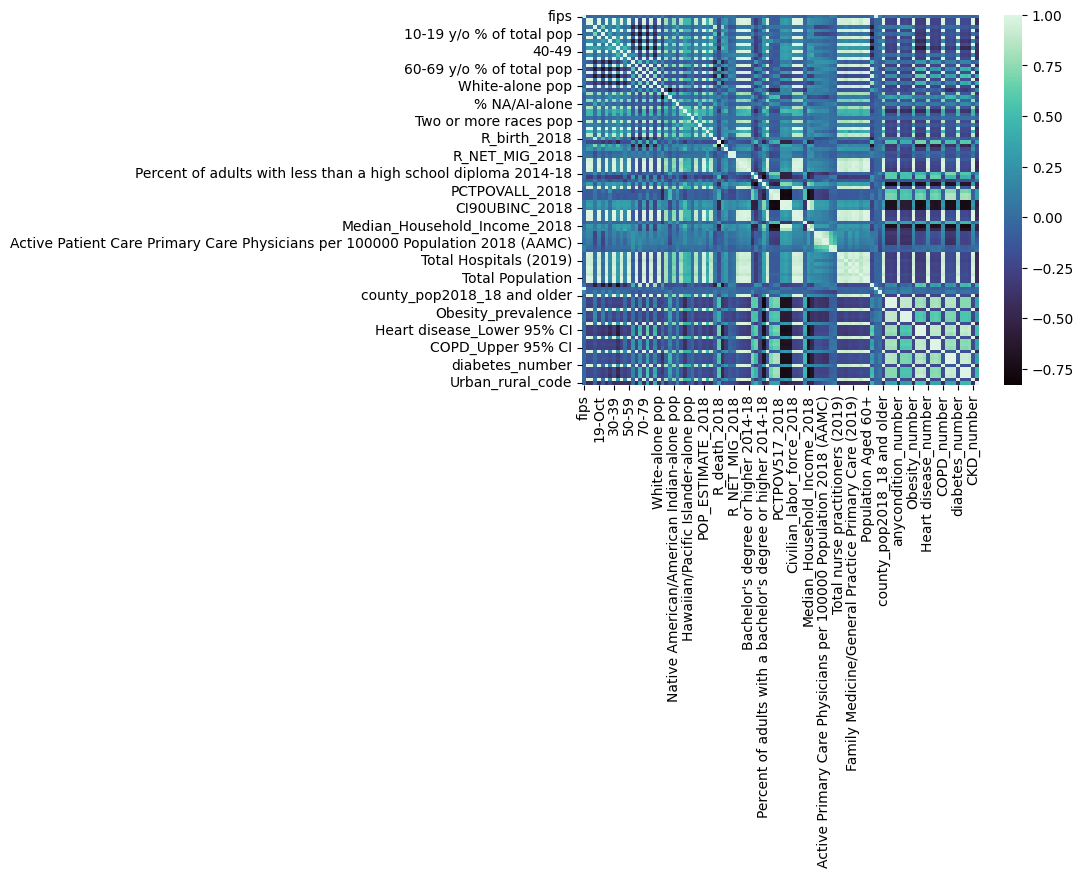

In [9]:
sns.heatmap(df_numerical.corr(), annot = False, cmap="mako")

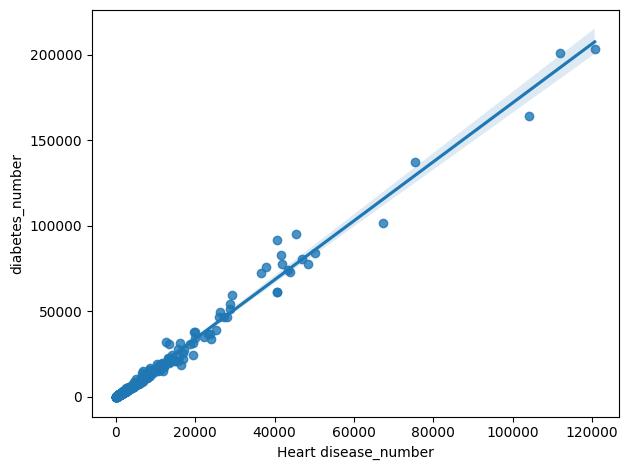

In [10]:
sns.regplot(data=df[df["Heart disease_number"]<200000].sample(500), x="Heart disease_number", y="diabetes_number")
plt.tight_layout()
plt.show()

<Axes: xlabel='White-alone pop', ylabel='Count'>

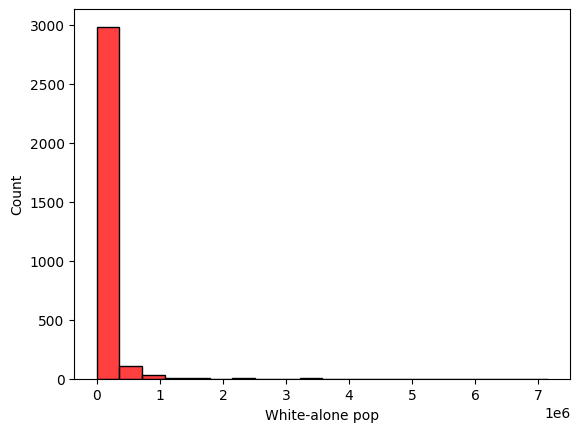

In [12]:
sns.histplot(data=df, x="White-alone pop", bins=20, color="red")

In [14]:
# We divide the dataset into training and test samples
X = df.drop("Heart disease_number", axis = 1)
y = df["Heart disease_number"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


<Axes: ylabel='Frequency'>

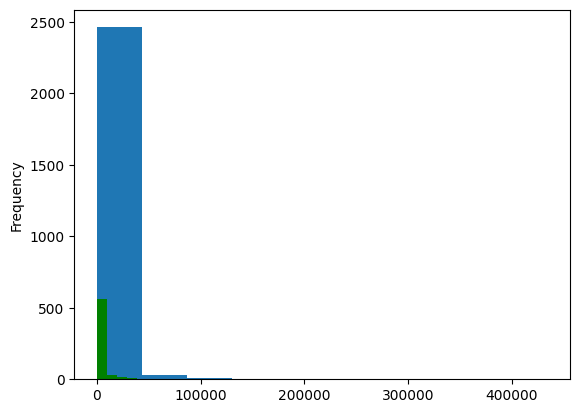

In [18]:
y_train.plot.hist()
y_test.plot.hist(color="green")

In [19]:
X_train.to_csv("X_Train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

In [20]:
selection_model = SelectKBest(f_classif, k = 58)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

In [23]:
#MinMax scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)


In [24]:
start_time = timeit.default_timer()

model = LinearRegression()
model.fit(X_train, y_train)

print("Training elapsed time: ", timeit.default_timer()-start_time)

Training elapsed time:  0.008918739999899117


In [29]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [30]:
print(r2_score(y_train, y_train_pred))

0.9994871077439599


In [31]:
print(r2_score(y_test, y_pred))

0.9982487142238489


In [32]:
print(mean_absolute_percentage_error(y_train, y_train_pred))

0.08768399704894572


In [33]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.0728212346555419


In [34]:
print(mean_squared_error(y_train, y_train_pred)**0.5)

380.6615980443503


In [35]:
print(mean_squared_error(y_test, y_pred)**0.5)

391.512608859045


In [36]:
y_test.shape

(628,)

In [44]:
lasso_model = Lasso(alpha = 0.1, max_iter = 300)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.011e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [38]:
print(r2_score(y_test, y_pred))

0.995298779109358


In [39]:
print(mean_squared_error(y_test, y_pred)**0.5)

641.4644190193277


In [40]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.1303624899349288


In [43]:
ridge_model = Ridge(alpha = 0.1, max_iter = 300)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40634e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [45]:
print(r2_score(y_test, y_pred))

0.995298779109358


In [46]:
print(mean_squared_error(y_test, y_pred)**0.5)

641.4644190193277


In [47]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.1303624899349288


In [48]:
# Hyperparameter grid (adjust as needed)
hyperparams = {
    "fit_intercept": [True, False],
   # "normalize": [True, False]
}

# We initialize the grid
random = RandomizedSearchCV(model, hyperparams, scoring = "neg_mean_squared_error", cv = 5)
random

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [49]:
# Fit the model to your data
random.fit(X_train, y_train)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [50]:
random_best  = random.best_estimator_
random_best

LinearRegression(fit_intercept=False)

In [51]:
print("r2 score : ",r2_score(y_test, y_pred))
print("Mean Absolute Percentage Error: ",mean_absolute_percentage_error(y_test, y_pred))

r2 score :  0.995298779109358
Mean Absolute Percentage Error:  0.1303624899349288
